In [12]:
from __future__ import absolute_import
import sys
from six.moves import cPickle
from six.moves import range

import numpy as np
import os

import matplotlib.pyplot as plt
from PIL import Image,ImageFilter

%matplotlib inline


In [2]:
def load_batch(fpath, label_key='labels'):
    f = open(fpath, 'rb')
    if sys.version_info < (3,):
        d = cPickle.load(f)
    else:
        d = cPickle.load(f, encoding="bytes")
        # decode utf8
        for k, v in d.items():
            del(d[k])
            d[k.decode("utf8")] = v
    f.close()
    data = d["data"]
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels

In [6]:
def load_data():
    dirname = "cifar-10-batches-py"
    datadir = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    path = os.path.join(datadir, dirname)
    
    
    nb_test_samples = 10000
    nb_train_samples = 50000

    X_train = np.zeros((nb_train_samples, 3, 32, 32), dtype="uint8")
    y_train = np.zeros((nb_train_samples,), dtype="uint8")

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        data, labels = load_batch(fpath)
        X_train[(i-1)*10000:i*10000, :, :, :] = data
        y_train[(i-1)*10000:i*10000] = labels

    fpath = os.path.join(path, 'test_batch')
    X_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    return (X_train, y_train), (X_test, y_test)

In [9]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [35]:
def view_images(images):
    cols = len(images) if len(images) < 10 else 10
    fig, axes = plt.subplots(figsize=(8, 8), nrows=1, ncols=cols, sharey=True, sharex=True)
    for i, ax in enumerate(axes.flatten()): 
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False) 
        im = ax.imshow(images[i])

In [15]:
def array_to_img(x, scale=True):
    from PIL import Image
    x = x.transpose(1, 2, 0) 
    if scale:
        x += max(-np.min(x), 0)
        x /= np.max(x)
        x *= 255
    if x.shape[2] == 3:
        # RGB
        return Image.fromarray(x.astype("uint8"), "RGB")
    else:
        # grayscale
        return Image.fromarray(x[:,:,0].astype("uint8"), "L")

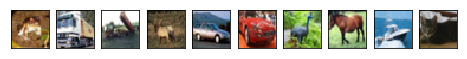

In [36]:
imgs = [array_to_img(x,False) for x in X_train[0:10]]
view_images(imgs)

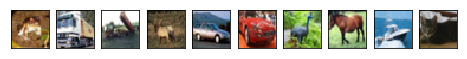

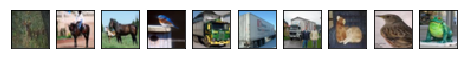

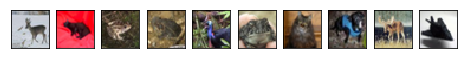

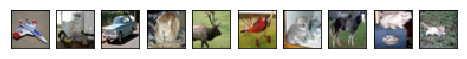

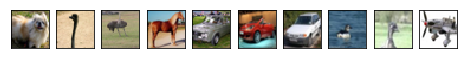

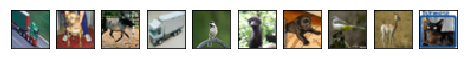

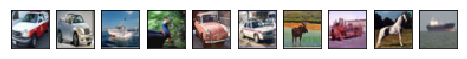

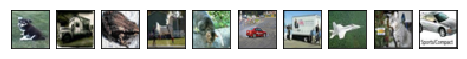

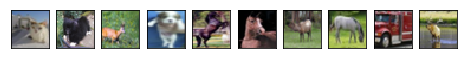

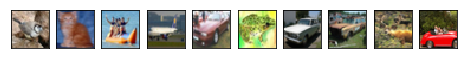

In [37]:
for i in range(10):
    imgs = [array_to_img(x,False) for x in X_train[i*10:(i+1)*10]]
    view_images(imgs)